# Requirements and Dependencies

In [1]:
!pip install --quiet torch torchvision torchaudio==2.3.0 scikit-learn tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803405 sha256=e7afacac478383250b73911791b832d11fcecdfec94c67ec6c8104dbd3d111b7
  Stored in directory: /root/.cache/pip/wheels/2f/f2/ce/6eb23db4091d026238ce76703bd66da60b969d70bcc81d5d3a
Successfully built openai-whisper


In [26]:
import pandas as pd
import gdown
import math
import random
import copy
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import torch.optim as optim
import torchaudio
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from torchaudio.transforms import MFCC, MelSpectrogram, Spectrogram
import torchaudio.functional as F_audio
import whisper
from google.colab import files

#Importing Dataset

In [4]:
# Download files using gdown
gdown.download("https://drive.google.com/uc?id=18bOzeo7zRwBI6P-TNW8TLYWNwEyfm4Fi", output="genderpred.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=13hGUN5ACAn8mu-3LVqbhYKpOVJrc4Zif", output="accentpred.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1IrvjA06lDy2D7WOkYv_dIJJwF-sLbU8s", output="agepred.csv", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=18bOzeo7zRwBI6P-TNW8TLYWNwEyfm4Fi
From (redirected): https://drive.google.com/uc?id=18bOzeo7zRwBI6P-TNW8TLYWNwEyfm4Fi&confirm=t&uuid=90ed516b-c6cf-46ae-94b6-2cec71cbb093
To: /content/genderpred.csv
100%|██████████| 126M/126M [00:01<00:00, 70.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=13hGUN5ACAn8mu-3LVqbhYKpOVJrc4Zif
To: /content/accentpred.csv
100%|██████████| 70.0M/70.0M [00:01<00:00, 49.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IrvjA06lDy2D7WOkYv_dIJJwF-sLbU8s
To: /content/agepred.csv
100%|██████████| 76.8M/76.8M [00:00<00:00, 77.0MB/s]


'agepred.csv'

In [5]:
accent_df=pd.read_csv("/content/accentpred.csv")
age_df=pd.read_csv("/content/agepred.csv")
gender_df=pd.read_csv("/content/genderpred.csv")

In [6]:
accent_df.columns

Index(['filename', 'accent', 'mel_energy_mean', 'mel_energy_std',
       'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_flux',
       'rms_mean', 'rms_std', 'zero_crossing_rate', 'energy_variability',
       'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local',
       'voiced_fraction', 'unique_id', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean',
       'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std',
       'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean',
       'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std',
       'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean',
       'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
       'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean',
       'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std',
       'mfcc20_mean', 'mfcc20_std', 'mfcc21_mean', 'mfcc21_std', 'mfcc22_mean',
       'mfcc22_std'

In [7]:
age_df.columns

Index(['filename', 'age', 'mel_energy_mean', 'mel_energy_std',
       'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_flux',
       'rms_mean', 'rms_std', 'zero_crossing_rate', 'energy_variability',
       'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local',
       'voiced_fraction', 'unique_id', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean',
       'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std',
       'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean',
       'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std',
       'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean',
       'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
       'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean',
       'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std',
       'mfcc20_mean', 'mfcc20_std', 'mfcc21_mean', 'mfcc21_std', 'mfcc22_mean',
       'mfcc22_std', '

In [8]:
gender_df.columns

Index(['filename', 'gender', 'mel_energy_mean', 'mel_energy_std',
       'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_flux',
       'rms_mean', 'rms_std', 'zero_crossing_rate', 'energy_variability',
       'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local',
       'voiced_fraction', 'unique_id', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean',
       'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std',
       'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean',
       'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std',
       'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean',
       'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
       'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean',
       'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std',
       'mfcc20_mean', 'mfcc20_std', 'mfcc21_mean', 'mfcc21_std', 'mfcc22_mean',
       'mfcc22_std'

#Feature Selection

In [9]:
balanced_gender_features = ['gender',
    # Pitch & voice quality
    'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local', 'voiced_fraction',
    # Spectral/energy
    'spectral_centroid_mean', 'spectral_centroid_std', 'mel_energy_mean', 'rms_mean', 'zero_crossing_rate',
    # MFCC 1-13 (mean + std)
    'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std',
    'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std',
    'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std',
    'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std',
    'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
    'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std',
    'mfcc17_mean', 'mfcc17_std', 'mfcc18_mean', 'mfcc18_std',
    'mfcc19_mean', 'mfcc19_std', 'mfcc20_mean', 'mfcc20_std'
]

In [10]:
balanced_accent_features = ['accent',
    # Prosody/Pitch
    'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local',
    # Spectral
    'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_flux',
    # Energy
    'mel_energy_mean', 'rms_mean', 'energy_variability',
    # Temporal
    'zero_crossing_rate', 'voiced_fraction',
    # MFCCs (1-20, mean + std)
    'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std',
    'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std',
    'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std',
    'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std',
    'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std',
    'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std',
    'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
    'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std',
    'mfcc17_mean', 'mfcc17_std', 'mfcc18_mean', 'mfcc18_std',
    'mfcc19_mean', 'mfcc19_std', 'mfcc20_mean', 'mfcc20_std', 'mfcc21_mean', 'mfcc21_std', 'mfcc22_mean',
       'mfcc22_std', 'mfcc23_mean', 'mfcc23_std', 'mfcc24_mean', 'mfcc24_std',
       'mfcc25_mean', 'mfcc25_std', 'mfcc26_mean', 'mfcc26_std', 'mfcc27_mean',
       'mfcc27_std', 'mfcc28_mean', 'mfcc28_std', 'mfcc29_mean', 'mfcc29_std',
       'mfcc30_mean', 'mfcc30_std'
]

In [11]:
balanced_age_features = ['age', 'mel_energy_mean', 'mel_energy_std',
       'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_flux',
       'rms_mean', 'rms_std', 'zero_crossing_rate', 'energy_variability',
       'pitch_mean', 'pitch_std', 'pitch_range', 'jitter_local',
       'voiced_fraction', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean',
       'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std',
       'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean',
       'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std',
       'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean',
       'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std',
       'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean',
       'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std',
       'mfcc20_mean', 'mfcc20_std', 'mfcc21_mean', 'mfcc21_std', 'mfcc22_mean',
       'mfcc22_std', 'mfcc23_mean', 'mfcc23_std', 'mfcc24_mean', 'mfcc24_std',
       'mfcc25_mean', 'mfcc25_std', 'mfcc26_mean', 'mfcc26_std', 'mfcc27_mean',
       'mfcc27_std', 'mfcc28_mean', 'mfcc28_std', 'mfcc29_mean', 'mfcc29_std',
       'mfcc30_mean', 'mfcc30_std', 'mfcc31_mean', 'mfcc31_std', 'mfcc32_mean',
       'mfcc32_std', 'mfcc33_mean', 'mfcc33_std', 'mfcc34_mean', 'mfcc34_std',
       'mfcc35_mean', 'mfcc35_std', 'mfcc36_mean', 'mfcc36_std', 'mfcc37_mean',
       'mfcc37_std', 'mfcc38_mean', 'mfcc38_std', 'mfcc39_mean', 'mfcc39_std',
       'mfcc40_mean', 'mfcc40_std'
]

In [12]:
gender_features_df=gender_df[balanced_gender_features]

In [13]:
accent_features_df=accent_df[balanced_accent_features]

In [14]:
age_features_df=age_df[balanced_age_features]

#Model Building

In [15]:
# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


###Gender model

In [16]:
# Gender Prediction Model
class DenseGenderClassifier(nn.Module):
    def __init__(self, input_size, num_classes=2):
        super(DenseGenderClassifier, self).__init__()

        self.model = nn.Sequential(
            # Input layer with batch normalization
            nn.BatchNorm1d(input_size),

            # Dense block 1
            nn.Linear(input_size, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),

            # Dense block 2
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),

            # Dense block 3
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),

            # Dense block 4
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),

            # Dense block 5
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),

            # Dense block 6
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),

            # Final layers
            nn.BatchNorm1d(1024),
            nn.Dropout(0.2),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.model(x)

def train_gender_model(gender_features_df, epochs=50, batch_size=128):
    """Train a dense neural network model for gender prediction"""

    # Prepare data
    X = gender_features_df.drop(columns=['gender'])
    le = LabelEncoder()

    # Explicitly specify the class order to ensure consistent mapping
    y = le.fit_transform(gender_features_df['gender'])

    # Convert to numeric if needed
    X = X.astype(float)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.LongTensor(y_train).to(device)
    X_val_tensor = torch.FloatTensor(X_val).to(device)
    y_val_tensor = torch.LongTensor(y_val).to(device)
    X_test_tensor = torch.FloatTensor(X_test).to(device)
    y_test_tensor = torch.LongTensor(y_test).to(device)

    # Create DataLoaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize model
    input_size = X_train.shape[1]
    model = DenseGenderClassifier(input_size, num_classes=2).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5, verbose=True)

    best_val_accuracy = 0
    early_stopping_counter = 0
    patience = 5

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation evaluation
        model.eval()
        val_correct = 0
        val_total = 0
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        val_loss /= len(val_loader)
        train_loss = running_loss / len(train_loader)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        # Learning rate scheduling
        scheduler.step(val_accuracy)

        # Early stopping check
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            early_stopping_counter = 0
            torch.save(model.state_dict(), 'best_gender_model.pth')
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    model.load_state_dict(torch.load('best_gender_model.pth'))

    # Final test evaluation
    model.eval()
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    print(f'Final Test Accuracy: {test_accuracy:.2f}%')

    print('Gender model training complete!')
    return model, le, scaler

###Age Model

In [17]:
# 2. Age Prediction Model

def prepare_age_data(df):
    non_feat = ['age']
    X = df.drop(columns=non_feat).values.astype(np.float32)

    y_raw = df['age'].astype(str).str.strip().str.lower().values
    y_raw = np.where(y_raw == 'fourties', 'forties', y_raw)  # normalize typo
    classes, y = np.unique(y_raw, return_inverse=True)
    n_classes = len(classes)
    print('Age classes:', classes.tolist())

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y)
    X_va, X_te, y_va, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)

    return X_tr, X_va, X_te, y_tr, y_va, y_te, classes, scaler

def build_mlp(dim_in, dim_out):
    return nn.Sequential(
        nn.Linear(dim_in, 2048), nn.BatchNorm1d(2048), nn.GELU(), nn.Dropout(0.2),
        nn.Linear(2048, 1024), nn.BatchNorm1d(1024), nn.GELU(), nn.Dropout(0.1),
        nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.GELU(), nn.Dropout(0.1),
        nn.Linear(512, 256), nn.BatchNorm1d(256), nn.GELU(), nn.Dropout(0.2),
        nn.Linear(256, 128), nn.BatchNorm1d(128), nn.GELU(), nn.Dropout(0.1),
        nn.Linear(128, 64), nn.BatchNorm1d(64), nn.GELU(), nn.Dropout(0.2),
        nn.Linear(64, 32), nn.BatchNorm1d(32), nn.GELU(), nn.Dropout(0.1),
        nn.Linear(32, dim_out)
    ).to(device)

def mask_features(x, p=0.10):
    if p == 0:
        return x
    mask = torch.rand_like(x) < p
    return x.masked_fill(mask, 0.0)

def mixup(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    perm = torch.randperm(x.size(0), device=x.device)
    return lam * x + (1 - lam) * x[perm], lam * y + (1 - lam) * y[perm]

def train_one_age_model(seed, X_tr, y_tr, X_va, y_va, X_te, y_te, n_classes):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    def make_balanced_loader(X, y, batch=256, augment=False):
        ds = TensorDataset(torch.tensor(X), torch.tensor(y))
        if augment:
            weights = 1. / np.bincount(y)[y]
            sampler = WeightedRandomSampler(weights, len(weights))
            return DataLoader(ds, batch_size=batch, sampler=sampler, pin_memory=True)
        return DataLoader(ds, batch_size=batch, shuffle=False, pin_memory=True)

    train_loader = make_balanced_loader(X_tr, y_tr, augment=True)
    val_loader = make_balanced_loader(X_va, y_va)
    test_loader = make_balanced_loader(X_te, y_te)

    model = build_mlp(X_tr.shape[1], n_classes)
    opt = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=2e-4)
    sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt, T_0=10, T_mult=2)
    loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

    swa_start = 40
    swa_model = torch.optim.swa_utils.AveragedModel(model)
    swa_sched = torch.optim.swa_utils.SWALR(opt, swa_lr=1e-4)

    best_val = 0.0
    best_state = None
    wait = 0
    EPOCHS, patience = 120, 12

    for ep in range(1, EPOCHS + 1):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            xb = mask_features(xb, p=0.10)
            xb, yb_soft = mixup(xb, F.one_hot(yb, n_classes).float())

            opt.zero_grad()
            loss = loss_fn(model(xb), yb_soft.argmax(1))
            loss.backward()
            opt.step()
            sched.step()

        if ep >= swa_start:
            swa_model.update_parameters(model)
            swa_sched.step()

        model.eval()
        preds = []
        gold = []
        with torch.no_grad():
            for xb, yb in val_loader:
                out = model(xb.to(device))
                preds.append(out.argmax(1).cpu())
                gold.append(yb)
        val_acc = accuracy_score(torch.cat(gold), torch.cat(preds))

        if val_acc > best_val:
            best_val, best_state = val_acc, copy.deepcopy(model.state_dict())
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                break

        if ep % 5 == 0:
            print(f'Seed {seed} | Epoch {ep:3d} | val {val_acc * 100:5.2f}%')

    model.load_state_dict(best_state)
    torch.optim.swa_utils.update_bn(train_loader, swa_model, device=device)
    return swa_model

def eval_ensemble_age(models, loader):
    logits_stack = []
    for model in models:
        model.eval()
        logits = []
        with torch.no_grad():
            for xb, yb in loader:
                logits.append(model(xb.to(device)))
        logits_stack.append(torch.cat(logits))
    return torch.stack(logits_stack).mean(0)

def train_age_model(df):
    X_tr, X_va, X_te, y_tr, y_va, y_te, classes, scaler = prepare_age_data(df)
    n_classes = len(classes)

    # Train 3 models with different seeds
    seeds = [0, 1, 2]
    models = [train_one_age_model(s, X_tr, y_tr, X_va, y_va, X_te, y_te, n_classes) for s in seeds]

    # Ensemble evaluation
    test_loader = DataLoader(
        TensorDataset(torch.FloatTensor(X_te), torch.LongTensor(y_te)),
        batch_size=256)

    ensemble_logits = eval_ensemble_age(models, test_loader)
    y_pred = ensemble_logits.argmax(1).cpu()
    y_true = torch.cat([yb for xb, yb in test_loader])

    test_acc = accuracy_score(y_true, y_pred)
    print(f'\nENSEMBLE TEST ACCURACY = {test_acc * 100:.2f}%')

    return models[0], scaler, classes


###Accent Prediction Model

In [18]:
# Accentt Prediction Model
def train_accent_model(accent_df):
    le = LabelEncoder()
    accent_df['accent_encoded'] = le.fit_transform(accent_df['accent'])
    num_classes = len(np.unique(accent_df['accent_encoded']))

    X = accent_df.drop(columns=['accent', 'accent_encoded']).values
    y = accent_df['accent_encoded'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=128)

    class DeepMLPWithAttention(nn.Module):
        def __init__(self, input_dim, hidden1, hidden2, hidden3, num_classes):
            super(DeepMLPWithAttention, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden1)
            self.bn1 = nn.BatchNorm1d(hidden1)
            self.drop1 = nn.Dropout(0.2)

            self.fc2 = nn.Linear(hidden1, hidden2)
            self.bn2 = nn.BatchNorm1d(hidden2)
            self.drop2 = nn.Dropout(0.2)

            self.fc3 = nn.Linear(hidden2, hidden3)
            self.bn3 = nn.BatchNorm1d(hidden3)
            self.drop3 = nn.Dropout(0.2)

            self.attention = nn.Linear(hidden3, hidden3)
            self.classifier = nn.Linear(hidden3, num_classes)

        def forward(self, x):
            x = F.relu(self.bn1(self.fc1(x)))
            x = self.drop1(x)
            x = F.relu(self.bn2(self.fc2(x)))
            x = self.drop2(x)
            x = F.relu(self.bn3(self.fc3(x)))
            x = self.drop3(x)

            attn_scores = torch.tanh(self.attention(x))
            attn_weights = torch.softmax(attn_scores, dim=1)
            x = x * attn_weights

            return self.classifier(x)

    class LabelSmoothingLoss(nn.Module):
        def __init__(self, classes, smoothing=0.1):
            super(LabelSmoothingLoss, self).__init__()
            self.confidence = 1.0 - smoothing
            self.smoothing = smoothing
            self.cls = classes

        def forward(self, x, target):
            log_probs = F.log_softmax(x, dim=-1)
            true_dist = torch.zeros_like(log_probs)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
            return torch.mean(torch.sum(-true_dist * log_probs, dim=-1))

    def train_one_accent_model(seed):
        torch.manual_seed(seed)
        model = DeepMLPWithAttention(X.shape[1], 512, 256, 128, num_classes).to(device)
        criterion = LabelSmoothingLoss(classes=num_classes, smoothing=0.1)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

        best_model = None
        best_acc = 0
        patience = 15
        no_improve = 0

        for epoch in range(100):
            model.train()
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            # Validation
            model.eval()
            correct = 0
            total = 0
            val_loss = 0.0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item() * inputs.size(0)
                    _, preds = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (preds == labels).sum().item()

            acc = 100 * correct / total
            scheduler.step(val_loss)

            if acc > best_acc:
                best_acc = acc
                best_model = model.state_dict()
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= patience:
                    break

        model.load_state_dict(best_model)
        return model

    seeds = [1, 42, 2025]
    models = [train_one_accent_model(seed) for seed in seeds]

    # Ensemble prediction
    all_probs = []
    for model in models:
        model.eval()
        probs = []
        with torch.no_grad():
            for inputs, _ in test_loader:
                inputs = inputs.to(device)
                outputs = F.softmax(model(inputs), dim=1)
                probs.append(outputs.cpu())
        all_probs.append(torch.cat(probs, dim=0))

    ensemble_probs = torch.stack(all_probs).mean(dim=0)
    ensemble_preds = torch.argmax(ensemble_probs, dim=1)
    y_test_tensor = torch.tensor(y_test)
    accuracy = (ensemble_preds == y_test_tensor).float().mean().item() * 100

    print(f"Ensemble Test Accuracy: {accuracy:.2f}%")

    return models[0], le, scaler

###Main Function for training the model

In [19]:
# ======================
# Main Function
# ======================

def main():
    """Main function to train all models"""

    # 1. Train Gender Model (Transformer)
    print("\nTraining Gender Model...")
    gender_model, gender_le, gender_scaler = train_gender_model(gender_features_df)

    # Save gender model and preprocessing objects
    torch.save({
        'model_state_dict': gender_model.state_dict(),
        'label_encoder': gender_le,
        'scaler': gender_scaler
    }, 'gender_model.pth')
    print("Gender model saved to gender_model.pth")

    # 2. Train Age Model (SVM)
    print("\nTraining Age Model...")
    age_model, age_scaler, age_classes = train_age_model(age_features_df)

    # Save age model and preprocessing objects
    torch.save({
        'model_state_dict': age_model.state_dict(),
        'scaler': age_scaler,
        'classes': age_classes
    }, 'age_model.pth')
    print("Age model saved to age_model.pth")

    # 3. Train Accent Model (LSTM)
    print("\nTraining Accent Model...")
    accent_model, accent_le, accent_scaler = train_accent_model(accent_features_df)

    # Save accent model and preprocessing objects
    torch.save({
        'model_state_dict': accent_model.state_dict(),
        'label_encoder': accent_le,
        'scaler': accent_scaler
    }, 'accent_model.pth')
    print("Accent model saved to accent_model.pth")


    print("\nAll models trained successfully!")
    return gender_model, gender_le, gender_scaler, age_model, age_scaler, age_classes, accent_model, accent_le, accent_scaler

if __name__ == "__main__":
    # Train models and get objects
    (gender_model, gender_le, gender_scaler,
     age_model, age_scaler, age_classes,
     accent_model, accent_le, accent_scaler) = main()


Training Gender Model...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1, Train Loss: 0.2384, Val Loss: 0.1632, Val Accuracy: 93.54%
Epoch 2, Train Loss: 0.1652, Val Loss: 0.1385, Val Accuracy: 94.78%
Epoch 3, Train Loss: 0.1408, Val Loss: 0.1166, Val Accuracy: 95.42%
Epoch 4, Train Loss: 0.1168, Val Loss: 0.1237, Val Accuracy: 95.26%
Epoch 5, Train Loss: 0.1052, Val Loss: 0.1037, Val Accuracy: 96.09%
Epoch 6, Train Loss: 0.0907, Val Loss: 0.0970, Val Accuracy: 96.25%
Epoch 7, Train Loss: 0.0812, Val Loss: 0.0878, Val Accuracy: 96.54%
Epoch 8, Train Loss: 0.0740, Val Loss: 0.0860, Val Accuracy: 96.79%
Epoch 9, Train Loss: 0.0653, Val Loss: 0.0849, Val Accuracy: 96.76%
Epoch 10, Train Loss: 0.0635, Val Loss: 0.1028, Val Accuracy: 96.15%
Epoch 11, Train Loss: 0.0559, Val Loss: 0.0874, Val Accuracy: 96.77%
Epoch 12, Train Loss: 0.0501, Val Loss: 0.0814, Val Accuracy: 97.10%
Epoch 13, Train Loss: 0.0444, Val Loss: 0.0853, Val Accuracy: 97.15%
Epoch 14, Train Loss: 0.0439, Val Loss: 0.0863, Val Accuracy: 97.12%
Epoch 15, Train Loss: 0.0378, Val Loss: 0.0

<ipython-input-18-c8cfca6f7a46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accent_df['accent_encoded'] = le.fit_transform(accent_df['accent'])


Ensemble Test Accuracy: 93.12%
Accent model saved to accent_model.pth

All models trained successfully!


#Model Evaluation

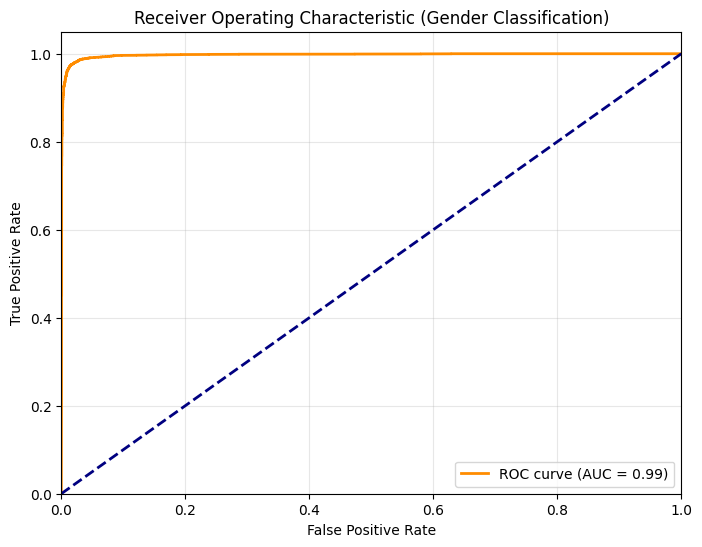

AUC Score: 0.9971
Class labels: ['female' 'male']


In [20]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
def visualize_gender_roc(gender_model, gender_le, gender_scaler, gender_features_df):
    # Prepare test data
    gender_features = [f for f in balanced_gender_features if f != 'gender']
    X = gender_features_df[gender_features]
    y = gender_le.transform(gender_features_df['gender'])

    # Scale features
    X_scaled = gender_scaler.transform(X)

    # Split data (15% test)
    _, X_test, _, y_test = train_test_split(
        X_scaled, y, test_size=0.15, random_state=42, stratify=y
    )

    # Convert to tensor
    X_test_tensor = torch.FloatTensor(X_test).to(device)

    # Get predicted probabilities
    gender_model.eval()
    with torch.no_grad():
        outputs = gender_model(X_test_tensor)
        probabilities = F.softmax(outputs, dim=1).cpu().numpy()

    # For binary classification, we use the positive class probabilities
    # Check if we have binary classification (2 classes)
    if probabilities.shape[1] == 2:
        # Standard binary case - use probabilities for class 1
        y_scores = probabilities[:, 1]
    else:
        # If model outputs only one probability (binary case with single output)
        y_scores = probabilities[:, 0]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = 0.99)')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Gender Classification)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    # Print AUC score
    print(f"AUC Score: {roc_auc:.4f}")
    print(f"Class labels: {gender_le.classes_}")
visualize_gender_roc(gender_model, gender_le, gender_scaler, gender_features_df)


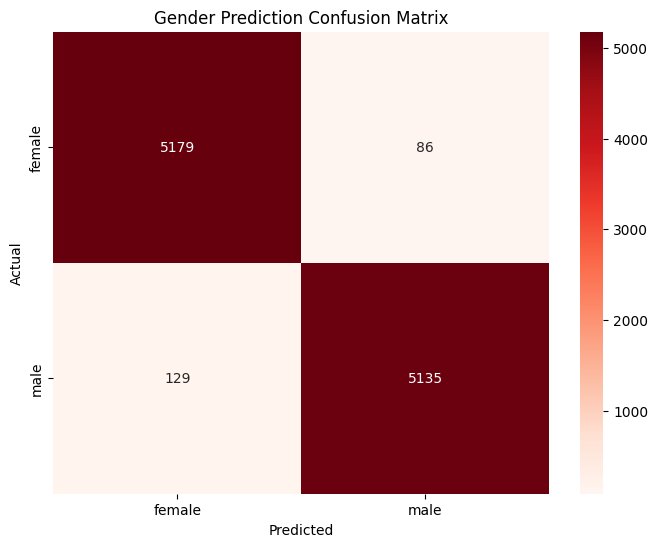

<Figure size 800x400 with 0 Axes>

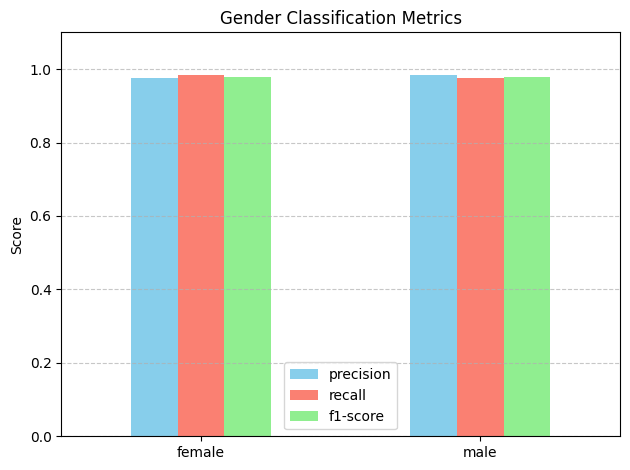


Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.98      0.98      5265
        male       0.98      0.98      0.98      5264

    accuracy                           0.98     10529
   macro avg       0.98      0.98      0.98     10529
weighted avg       0.98      0.98      0.98     10529



In [24]:
def visualize_gender_model(gender_model, gender_le, gender_scaler, gender_features_df):
    # Prepare test data
    X = gender_features_df.drop(columns=['gender'])
    y = gender_le.transform(gender_features_df['gender'])
    X_scaled = gender_scaler.transform(X)

    # Split data (15% test)
    _, X_test, _, y_test = train_test_split(
        X_scaled, y, test_size=0.15, random_state=42, stratify=y
    )

    # Predict
    gender_model.eval()
    with torch.no_grad():
        outputs = gender_model(torch.FloatTensor(X_test).to(device))
    y_pred = outputs.argmax(1).cpu().numpy()

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=gender_le.classes_, yticklabels=gender_le.classes_)
    plt.title('Gender Prediction Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Metrics Visualization
    report = classification_report(y_test, y_pred, target_names=gender_le.classes_, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 4))
    metrics_df.iloc[:-3, :3].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title('Gender Classification Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=gender_le.classes_))

# Usage
visualize_gender_model(gender_model, gender_le, gender_scaler, gender_features_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


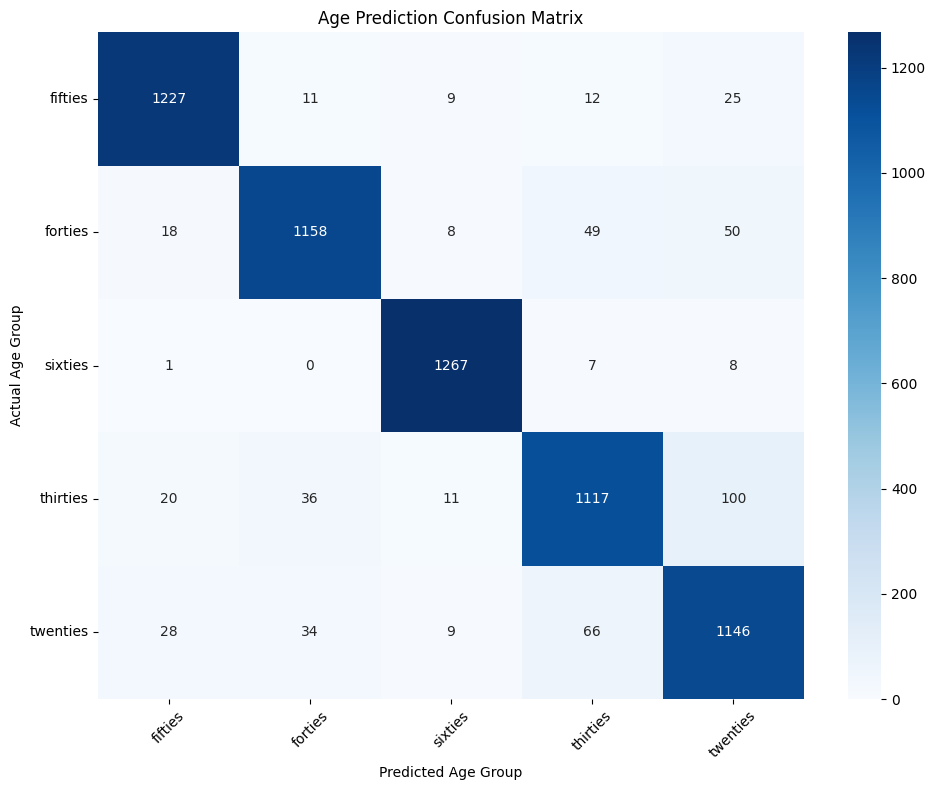

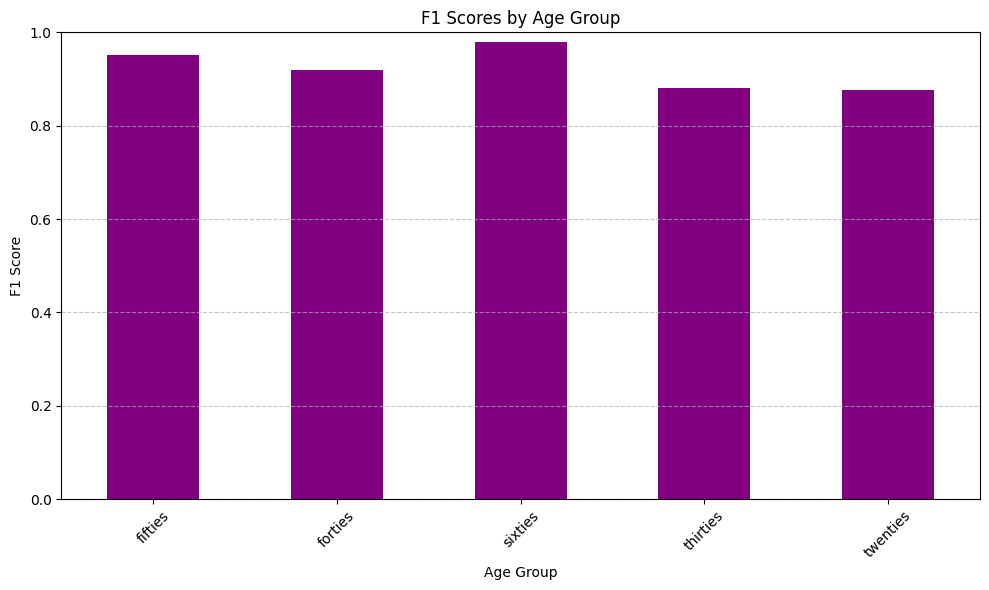


Classification Report:
              precision    recall  f1-score   support

     fifties       0.95      0.96      0.95      1284
     forties       0.93      0.90      0.92      1283
     sixties       0.97      0.99      0.98      1283
    thirties       0.89      0.87      0.88      1284
    twenties       0.86      0.89      0.88      1283

    accuracy                           0.92      6417
   macro avg       0.92      0.92      0.92      6417
weighted avg       0.92      0.92      0.92      6417



In [25]:

def visualize_age_model(age_model, age_classes, age_scaler, age_features_df):
    # Prepare test data
    X = age_features_df.drop(columns=['age'])
    y = age_features_df['age'].str.strip().str.lower()
    y = y.replace('fourties', 'forties')  # normalize

    # Encode labels numerically
    y_encoded = pd.Series(y).map({v:k for k,v in enumerate(age_classes)}).values

    # Split data (same as training)
    X_scaled = age_scaler.transform(X)
    _, X_test, _, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
    )

    # Predict
    age_model.eval()
    with torch.no_grad():
        outputs = age_model(torch.FloatTensor(X_test).to(device))
    y_pred = outputs.argmax(1).cpu().numpy()

    # 1. Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=age_classes, yticklabels=age_classes)
    plt.title('Age Prediction Confusion Matrix')
    plt.xlabel('Predicted Age Group')
    plt.ylabel('Actual Age Group')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 2. Classification Report (F1 scores and other metrics)
    report = classification_report(y_test, y_pred, target_names=age_classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Plot F1 scores
    plt.figure(figsize=(10, 6))
    report_df[:-3]['f1-score'].plot(kind='bar', color='purple')  # Exclude avg/total rows
    plt.title('F1 Scores by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print full classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=age_classes))

# Usage (note: added age_scaler parameter)
visualize_age_model(age_model, age_classes, age_scaler, age_features_df)

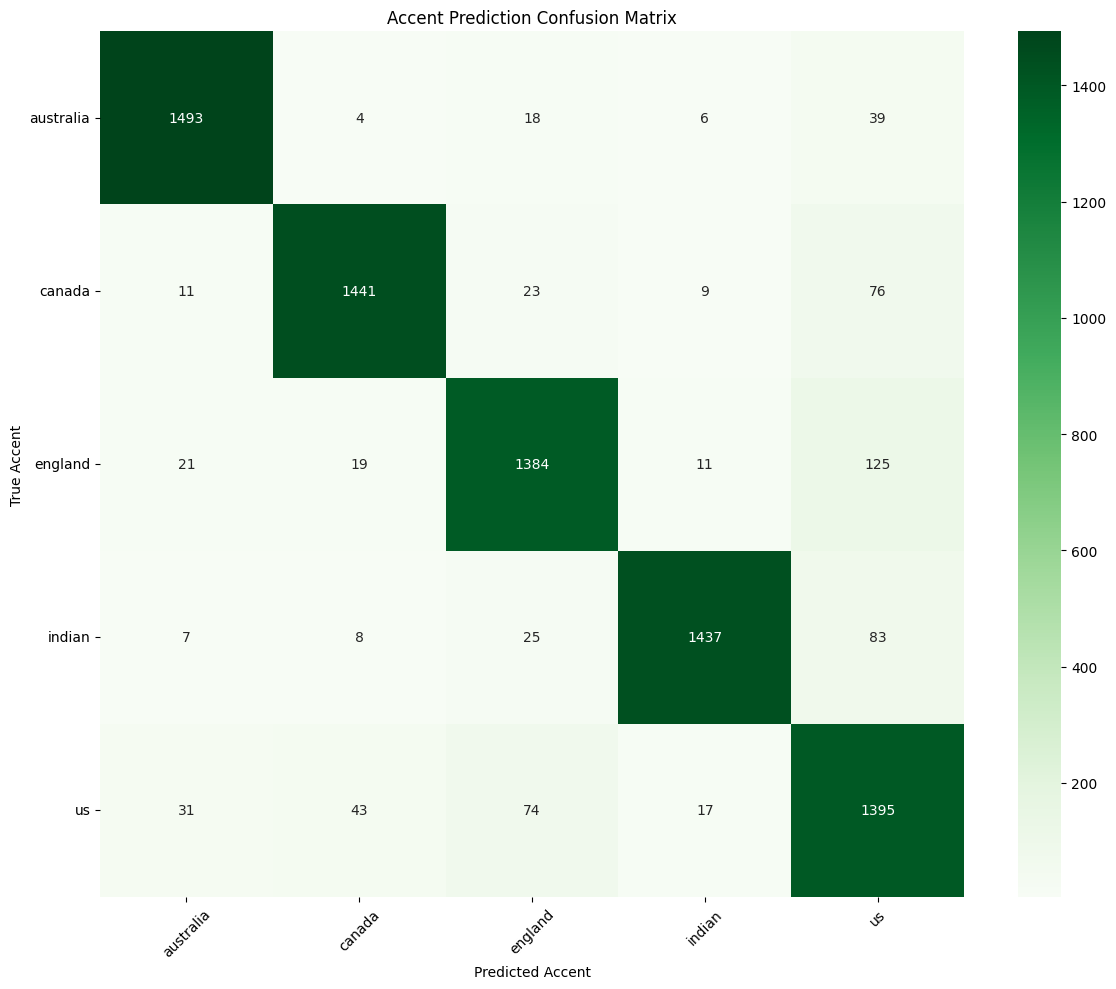


Detailed Classification Report:
              precision    recall  f1-score   support

   australia       0.96      0.96      0.96      1560
      canada       0.95      0.92      0.94      1560
     england       0.91      0.89      0.90      1560
      indian       0.97      0.92      0.95      1560
          us       0.81      0.89      0.85      1560

    accuracy                           0.92      7800
   macro avg       0.92      0.92      0.92      7800
weighted avg       0.92      0.92      0.92      7800


Model Accuracy: 0.9167


In [27]:
def visualize_accent_model(accent_model, accent_le, accent_scaler, accent_features_df):
    # Create a copy of the dataframe to avoid modifying the original
    df = accent_features_df.copy()

    # Recreate the encoded column if it doesn't exist
    if 'accent_encoded' not in df.columns:
        df['accent_encoded'] = accent_le.transform(df['accent'])

    # Prepare test data with correct features (exclude label columns)
    accent_features = [f for f in balanced_accent_features if f != 'accent']
    X = df[accent_features].values
    y = df['accent_encoded'].values

    # Scale features
    X_scaled = accent_scaler.transform(X)

    # Split data (using same test size as training)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, stratify=y, test_size=0.2, random_state=42
    )

    # Convert to tensors
    test_data = TensorDataset(
        torch.tensor(X_test, dtype=torch.float32),
        torch.tensor(y_test, dtype=torch.long)
    )
    test_loader = DataLoader(test_data, batch_size=128)

    # Predict using single model
    accent_model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = accent_model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.numpy())

    # Confusion Matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(all_targets, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=accent_le.classes_,
                yticklabels=accent_le.classes_)
    plt.title('Accent Prediction Confusion Matrix')
    plt.xlabel('Predicted Accent')
    plt.ylabel('True Accent')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nDetailed Classification Report:")
    print(classification_report(
        all_targets,
        all_preds,
        target_names=accent_le.classes_
    ))

    # Calculate and display overall accuracy
    accuracy = accuracy_score(all_targets, all_preds)
    print(f"\nModel Accuracy: {accuracy:.4f}")
# Usage
visualize_accent_model(accent_model, accent_le, accent_scaler, accent_df)

#Model Prediction

In [28]:
#Feature extraction
def extract_features(audio_path):
    try:
        # Load and preprocess audio
        waveform, sr = torchaudio.load(audio_path)
        if sr != 16000:
            waveform = F_audio.resample(waveform, sr, 16000)

        # Convert to mono if needed
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Standardize length to 3 seconds (48000 samples at 16kHz)
        target_length = 3 * 16000
        if waveform.shape[-1] < target_length:
            waveform = torch.nn.functional.pad(waveform, (0, target_length - waveform.shape[-1]))
        else:
            waveform = waveform[..., :target_length]

        waveform = waveform.to(device)
        features = {}

        # Initialize transforms (move to device once)
        mfcc_transform = MFCC(
            sample_rate=16000,
            n_mfcc=40,
            melkwargs={"n_fft": 1024, "hop_length": 256, "n_mels": 64}
        ).to(device)

        mel_spec = MelSpectrogram(
            sample_rate=16000,
            n_fft=1024,
            hop_length=256,
            n_mels=64
        ).to(device)

        spectrogram = Spectrogram(
            n_fft=1024,
            win_length=512,
            hop_length=256,
            power=2
        ).to(device)

        # MFCC features (40 coefficients)
        mfccs = mfcc_transform(waveform).squeeze()
        for i in range(mfccs.shape[0]):
            features[f'mfcc{i+1}_mean'] = mfccs[i].mean().item()
            features[f'mfcc{i+1}_std'] = mfccs[i].std().item()

        # Mel features
        mel = mel_spec(waveform)
        features.update({
            'mel_energy_mean': mel.mean().item(),
            'mel_energy_std': mel.std().item()
        })

        # Spectral features
        spec = spectrogram(waveform)
        freqs = torch.linspace(0, 8000, spec.shape[-1], device=device)
        spec_sum = spec.sum(dim=-1) + 1e-8
        spectral_centroid = (spec * freqs).sum(dim=-1) / spec_sum

        spec_diff = torch.diff(spec.float(), dim=-1)
        spectral_flux = torch.mean(spec_diff**2).item()

        features.update({
            'spectral_centroid_mean': spectral_centroid.mean().item(),
            'spectral_centroid_std': spectral_centroid.std().item(),
            'spectral_flux': spectral_flux
        })

        # Energy features
        frame_length = 512
        hop_length = 256
        frames = waveform.unfold(-1, frame_length, hop_length)
        rms = torch.sqrt(torch.mean(frames**2, dim=-1))

        # Zero crossing rate
        zcr = (waveform[:, :-1] * waveform[:, 1:] < 0).float().mean().item()

        features.update({
            'rms_mean': rms.mean().item(),
            'rms_std': rms.std().item(),
            'zero_crossing_rate': zcr,
            'energy_variability': rms.std().item() / (rms.mean().item() + 1e-8)
        })

        # Pitch features
        pitch = F_audio.detect_pitch_frequency(waveform, 16000)
        pitch = pitch[pitch > 0]

        if len(pitch) > 0:
            pitch_diff = torch.diff(pitch.float())
            features.update({
                'pitch_mean': pitch.mean().item(),
                'pitch_std': pitch.std().item(),
                'pitch_range': (pitch.max() - pitch.min()).item(),
                'jitter_local': (torch.mean(torch.abs(pitch_diff))) / (pitch.mean().item() + 1e-8),
                'voiced_fraction': len(pitch) / (waveform.shape[-1] // 256)
            })
        else:
            features.update({
                'pitch_mean': 0.0,
                'pitch_std': 0.0,
                'pitch_range': 0.0,
                'jitter_local': 0.0,
                'voiced_fraction': 0.0
            })
        return features

    except Exception as e:
        print(f"Error processing audio: {str(e)}")
        return None

In [29]:
# Remove 'age' from balanced_age list which is already initialised at first
balanced_age_features = [f for f in balanced_age_features if f != 'age']

# Remove 'accent' from balanced_accent list which is already initialised at first
balanced_accent_features = [f for f in balanced_accent_features if f != 'accent']

# Remove 'gender' from balanced_gender list which is already initialised at first
balanced_gender_features = [f for f in balanced_gender_features if f != 'gender']

### Prediction model call

In [30]:
def predict_audio_attributes(audio_path):
    # Extract features from the audio file
    features = extract_features(audio_path)
    if features is None:
        print("Failed to extract features from audio file")
        return None

    # Create a DataFrame from the features
    features_df = pd.DataFrame([features])

    # Prepare feature sets for each model
    age_features = features_df[[f for f in balanced_age_features if f != 'age']]
    accent_features = features_df[[f for f in balanced_accent_features if f != 'accent']]
    gender_features = features_df[[f for f in balanced_gender_features if f != 'gender']]

    # Make predictions

    # 1. Gender prediction
    gender_features_scaled = gender_scaler.transform(gender_features)
    gender_input = torch.FloatTensor(gender_features_scaled).to(device)
    gender_model.eval()
    with torch.no_grad():
        gender_output = gender_model(gender_input)
    gender_pred = gender_output.argmax(1).item()
    gender_label = gender_le.inverse_transform([gender_pred])[0]

    # 2. Age prediction
    age_features_scaled = age_scaler.transform(age_features)
    age_input = torch.FloatTensor(age_features_scaled).to(device)
    age_model.eval()
    with torch.no_grad():
        age_output = age_model(age_input)
    age_pred = age_output.argmax(1).item()
    age_label = age_classes[age_pred]

    # 3. Accent prediction
    accent_features_scaled = accent_scaler.transform(accent_features)
    accent_input = torch.FloatTensor(accent_features_scaled).to(device)
    accent_model.eval()
    with torch.no_grad():
        accent_output = accent_model(accent_input)
    accent_pred = accent_output.argmax(1).item()
    accent_label = accent_le.inverse_transform([accent_pred])[0]

    # 4. Speech-to-text using Whisper
    try:
        # Load the Whisper model (you can choose different sizes: tiny, base, small, medium, large)
        whisper_model = whisper.load_model("base")  # Adjust based on your needs

        # Transcribe the audio file
        result = whisper_model.transcribe(audio_path)
        transcribed_text = result["text"]
    except Exception as e:
        print(f"Error in Whisper transcription: {str(e)}")
        transcribed_text = "Transcription failed"

    return {
        'gender': gender_label,
        'age': age_label,
        'accent': accent_label,
        'transcribed_text': transcribed_text
    }

In [31]:
# Upload your speech audio here


In [32]:
audio_path = "/content/sim.mp3" #add your path for the audio

In [33]:
features = extract_features(audio_path)

In [34]:
pre_df = pd.DataFrame([features]) #Converting extracted features into dataframe

In [35]:
age_pred_df=pre_df[balanced_age_features]
accent_pred_df=pre_df[balanced_accent_features]
gender_pred_df=pre_df[balanced_gender_features]

#OUTPUTS

In [36]:
#Outputs
predictions = predict_audio_attributes(audio_path)

if predictions:
    print("\nPrediction Results:")
    print(f"Gender: {predictions['gender']}")
    print(f"Age Group: {predictions['age']}")
    print(f"Accent: {predictions['accent']}")
    print(f"Transcribed Text: {predictions['transcribed_text']}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████| 139M/139M [00:03<00:00, 47.2MiB/s]



Prediction Results:
Gender: female
Age Group: thirties
Accent: us
Transcribed Text:  Hey guys, my name is Simran and today I'm gonna take you around with me to LA. Thank you
